In [101]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
#from fancyimpute import IterativeImputer
#from skopt import BayesSearchCV

In [3]:
df=pd.read_csv('/Users/sujithanair/Desktop/amazon_prep/Ecommerce_Churn_Prediction.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


# Exploring the dataset

In [4]:
#By simply looking at the data we can see: 
#Missing values in multiple fields,
#non-uniformity in naming some of the fields
df.shape

(5630, 20)

In [5]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [8]:
##No duplicate rows

In [9]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].value_counts(),"\n")

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64 

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64 

Male      3384
Female    2246
Name: Gender, dtype: int64 

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 



In [10]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Mobile Phone','Phone')
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Mobile Phone','Mobile')

In [11]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [12]:
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace('CC','Credit Card')

In [13]:
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace('Cash on Delivery','COD')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,COD,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,Credit Card,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


## Missing Values

In [15]:
df1=df.copy()

In [16]:
n=0
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,"\n")
        print('null values',df[i].isnull().sum(),"\n")
        n+1
        df2=df.columns.insert(n,i)

Tenure 

null values 264 

WarehouseToHome 

null values 251 

HourSpendOnApp 

null values 255 

OrderAmountHikeFromlastYear 

null values 265 

CouponUsed 

null values 256 

OrderCount 

null values 258 

DaySinceLastOrder 

null values 307 



In [17]:
df2

Index(['DaySinceLastOrder', 'CustomerID', 'Churn', 'Tenure',
       'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [19]:
#Mean and Median are close enough so replacing with median incase of outliers
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [20]:
#Data Check
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        

In [21]:
#No Missing values found


## Checking for Outliers and plotting the data

In [23]:
#Check for normal distribution
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df=df.drop('CustomerID',axis=1)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,1,9.0,Phone,3,11.0,COD,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,1,9.0,Phone,1,6.0,Credit Card,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [24]:
df_numeric= df.select_dtypes(include=np.number)
df_numeric

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130
5,0.0,22.0,3.0,5,5,2,1,22.0,4.0,6.0,7.0,139
6,9.0,11.0,2.0,3,2,4,0,14.0,0.0,1.0,0.0,121
7,9.0,6.0,3.0,3,2,3,1,16.0,2.0,2.0,0.0,123
8,13.0,9.0,3.0,4,3,2,1,14.0,0.0,1.0,2.0,127
9,9.0,31.0,2.0,5,3,2,0,12.0,1.0,1.0,1.0,123


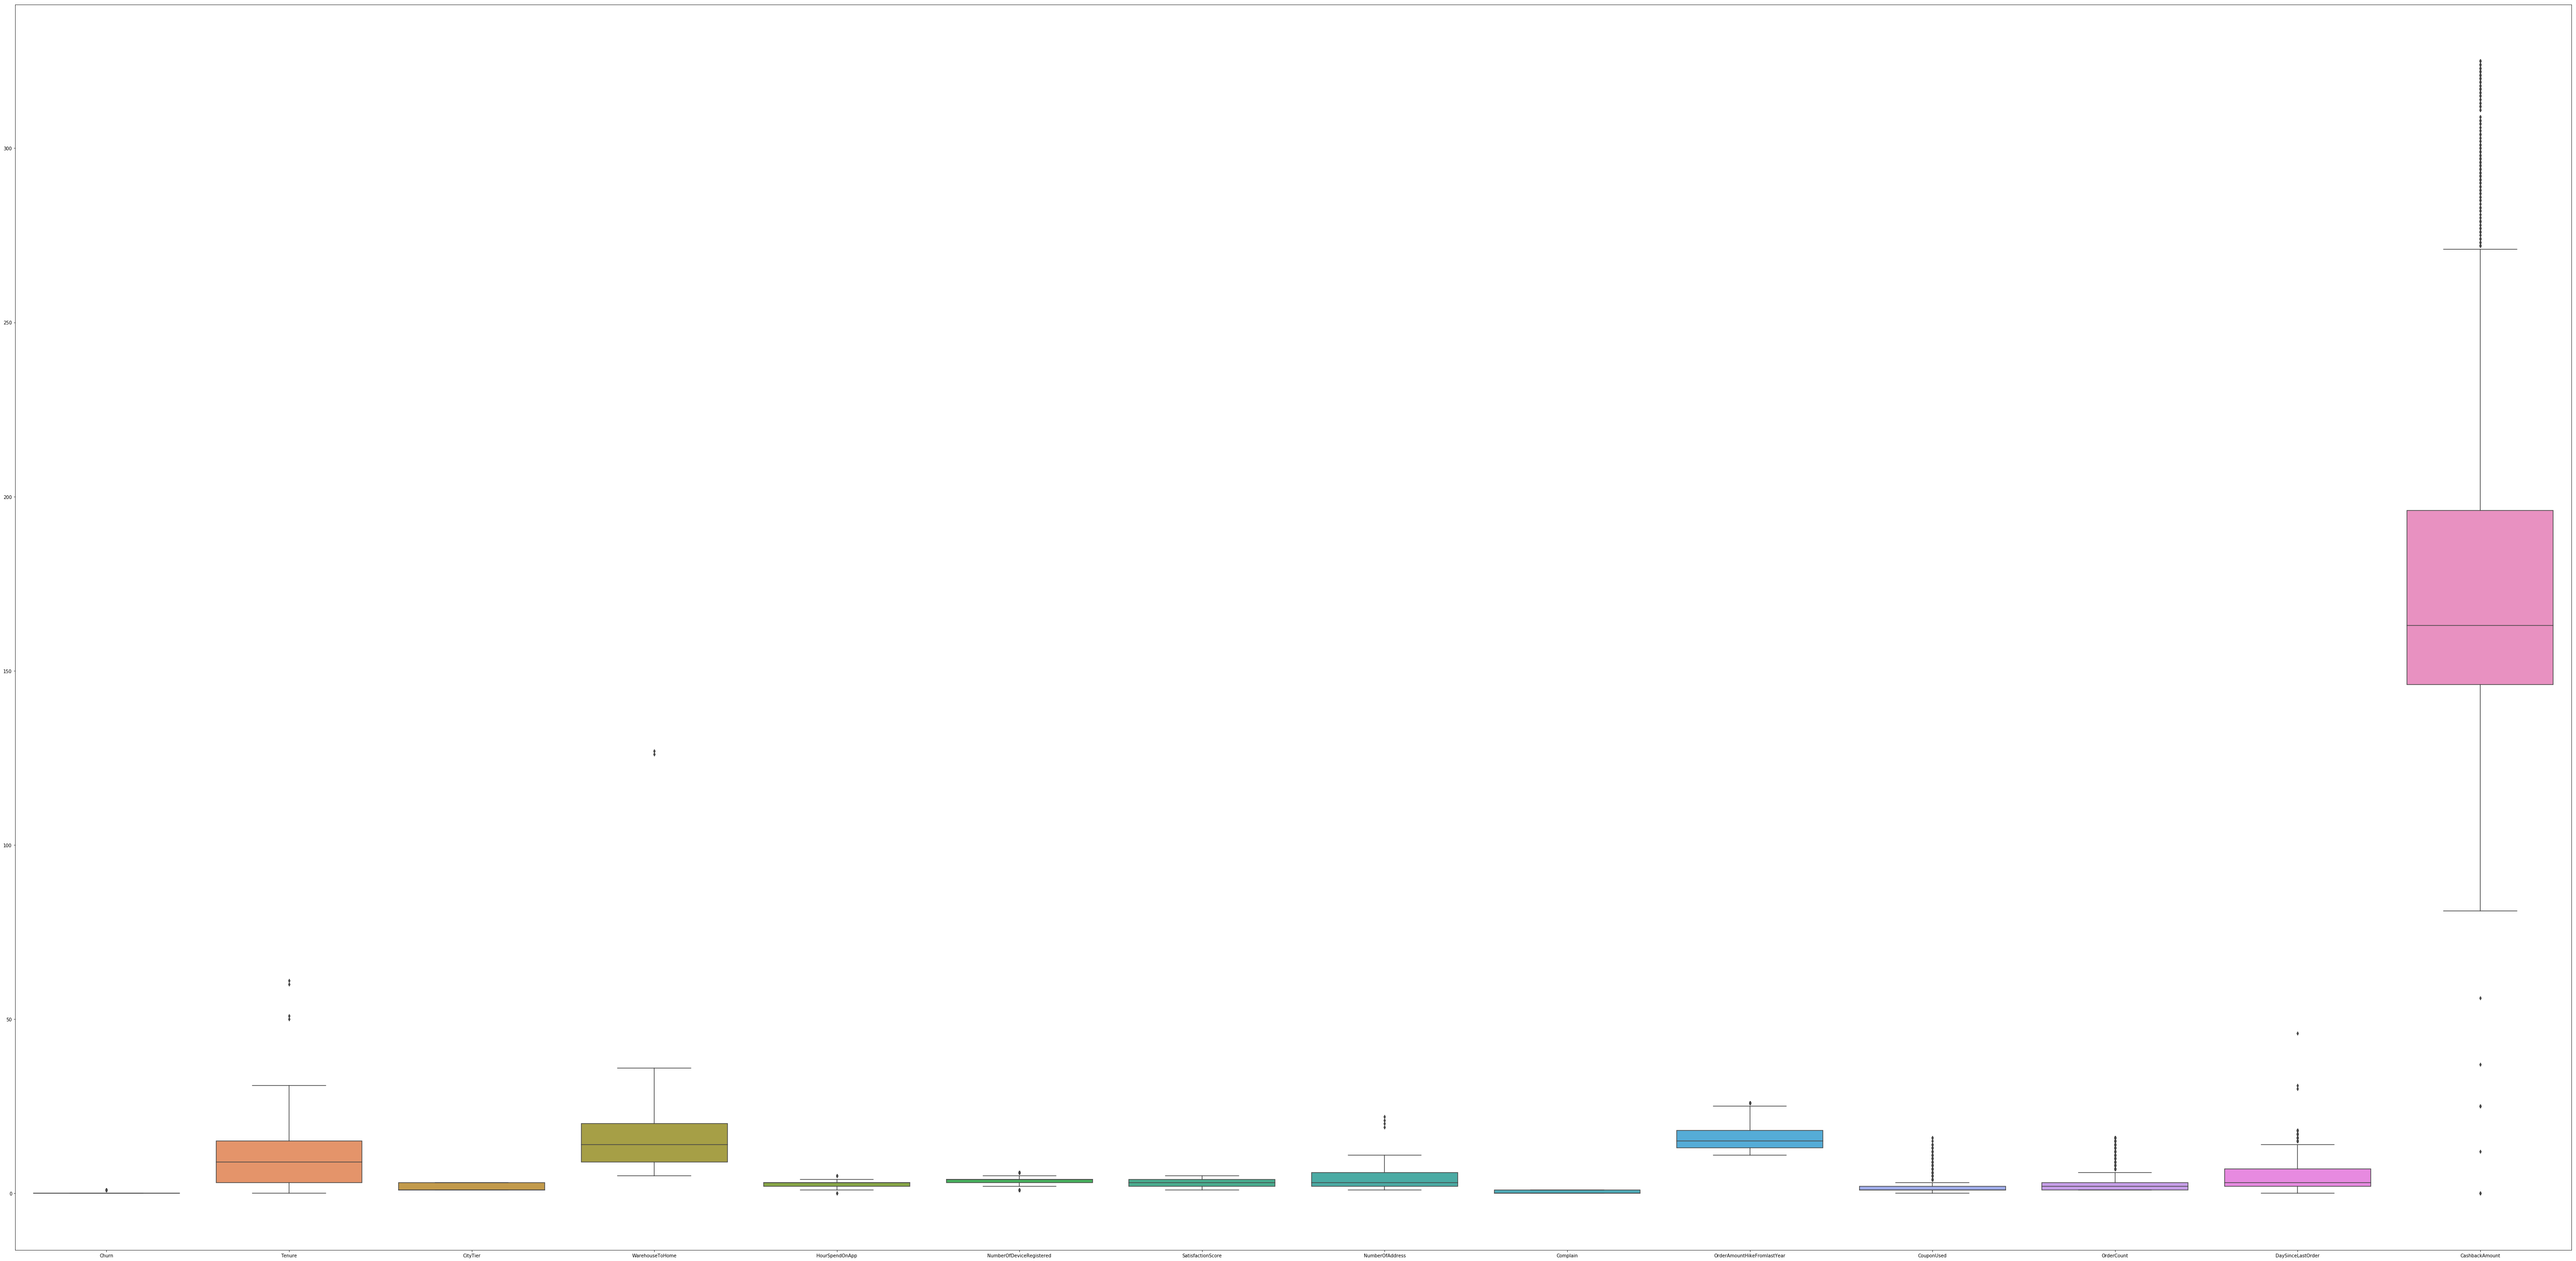

In [47]:
plt.figure(figsize=(100,50))
sns.boxplot(data=df)

for i in df_numeric.columns:
    plt.hist(df_numeric[i])

In [28]:
p=stats.normaltest(df_numeric)

In [29]:
p

NormaltestResult(statistic=array([ 451.34516555, 2375.32345292,  147.838657  ,  187.23378583,
       2713.03251862,  861.40962791, 2785.18193523,  509.71473797,
       3208.05903884, 2559.92173591, 1509.61528251,  925.54748708]), pvalue=array([9.80940316e-099, 0.00000000e+000, 7.89302589e-033, 2.20140523e-041,
       0.00000000e+000, 8.85678231e-188, 0.00000000e+000, 2.07420166e-111,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.04692799e-201]))

In [31]:
#Many p values less than 0.05. So the data is not normally distributes
#Function to Remove outliers using Percentile method

def remove_outlier(col):
    Q1,Q3= np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5*IQR)
    ur= Q3+(1.5*IQR)
    return lr,ur

In [42]:
for i in df_numeric.columns:
    lr,ur=remove_outlier(df_numeric[i])
    for n in range(len(df_numeric)):
                  if n<lr:
                      n=lr
                      if n>ur:
                        n=ur

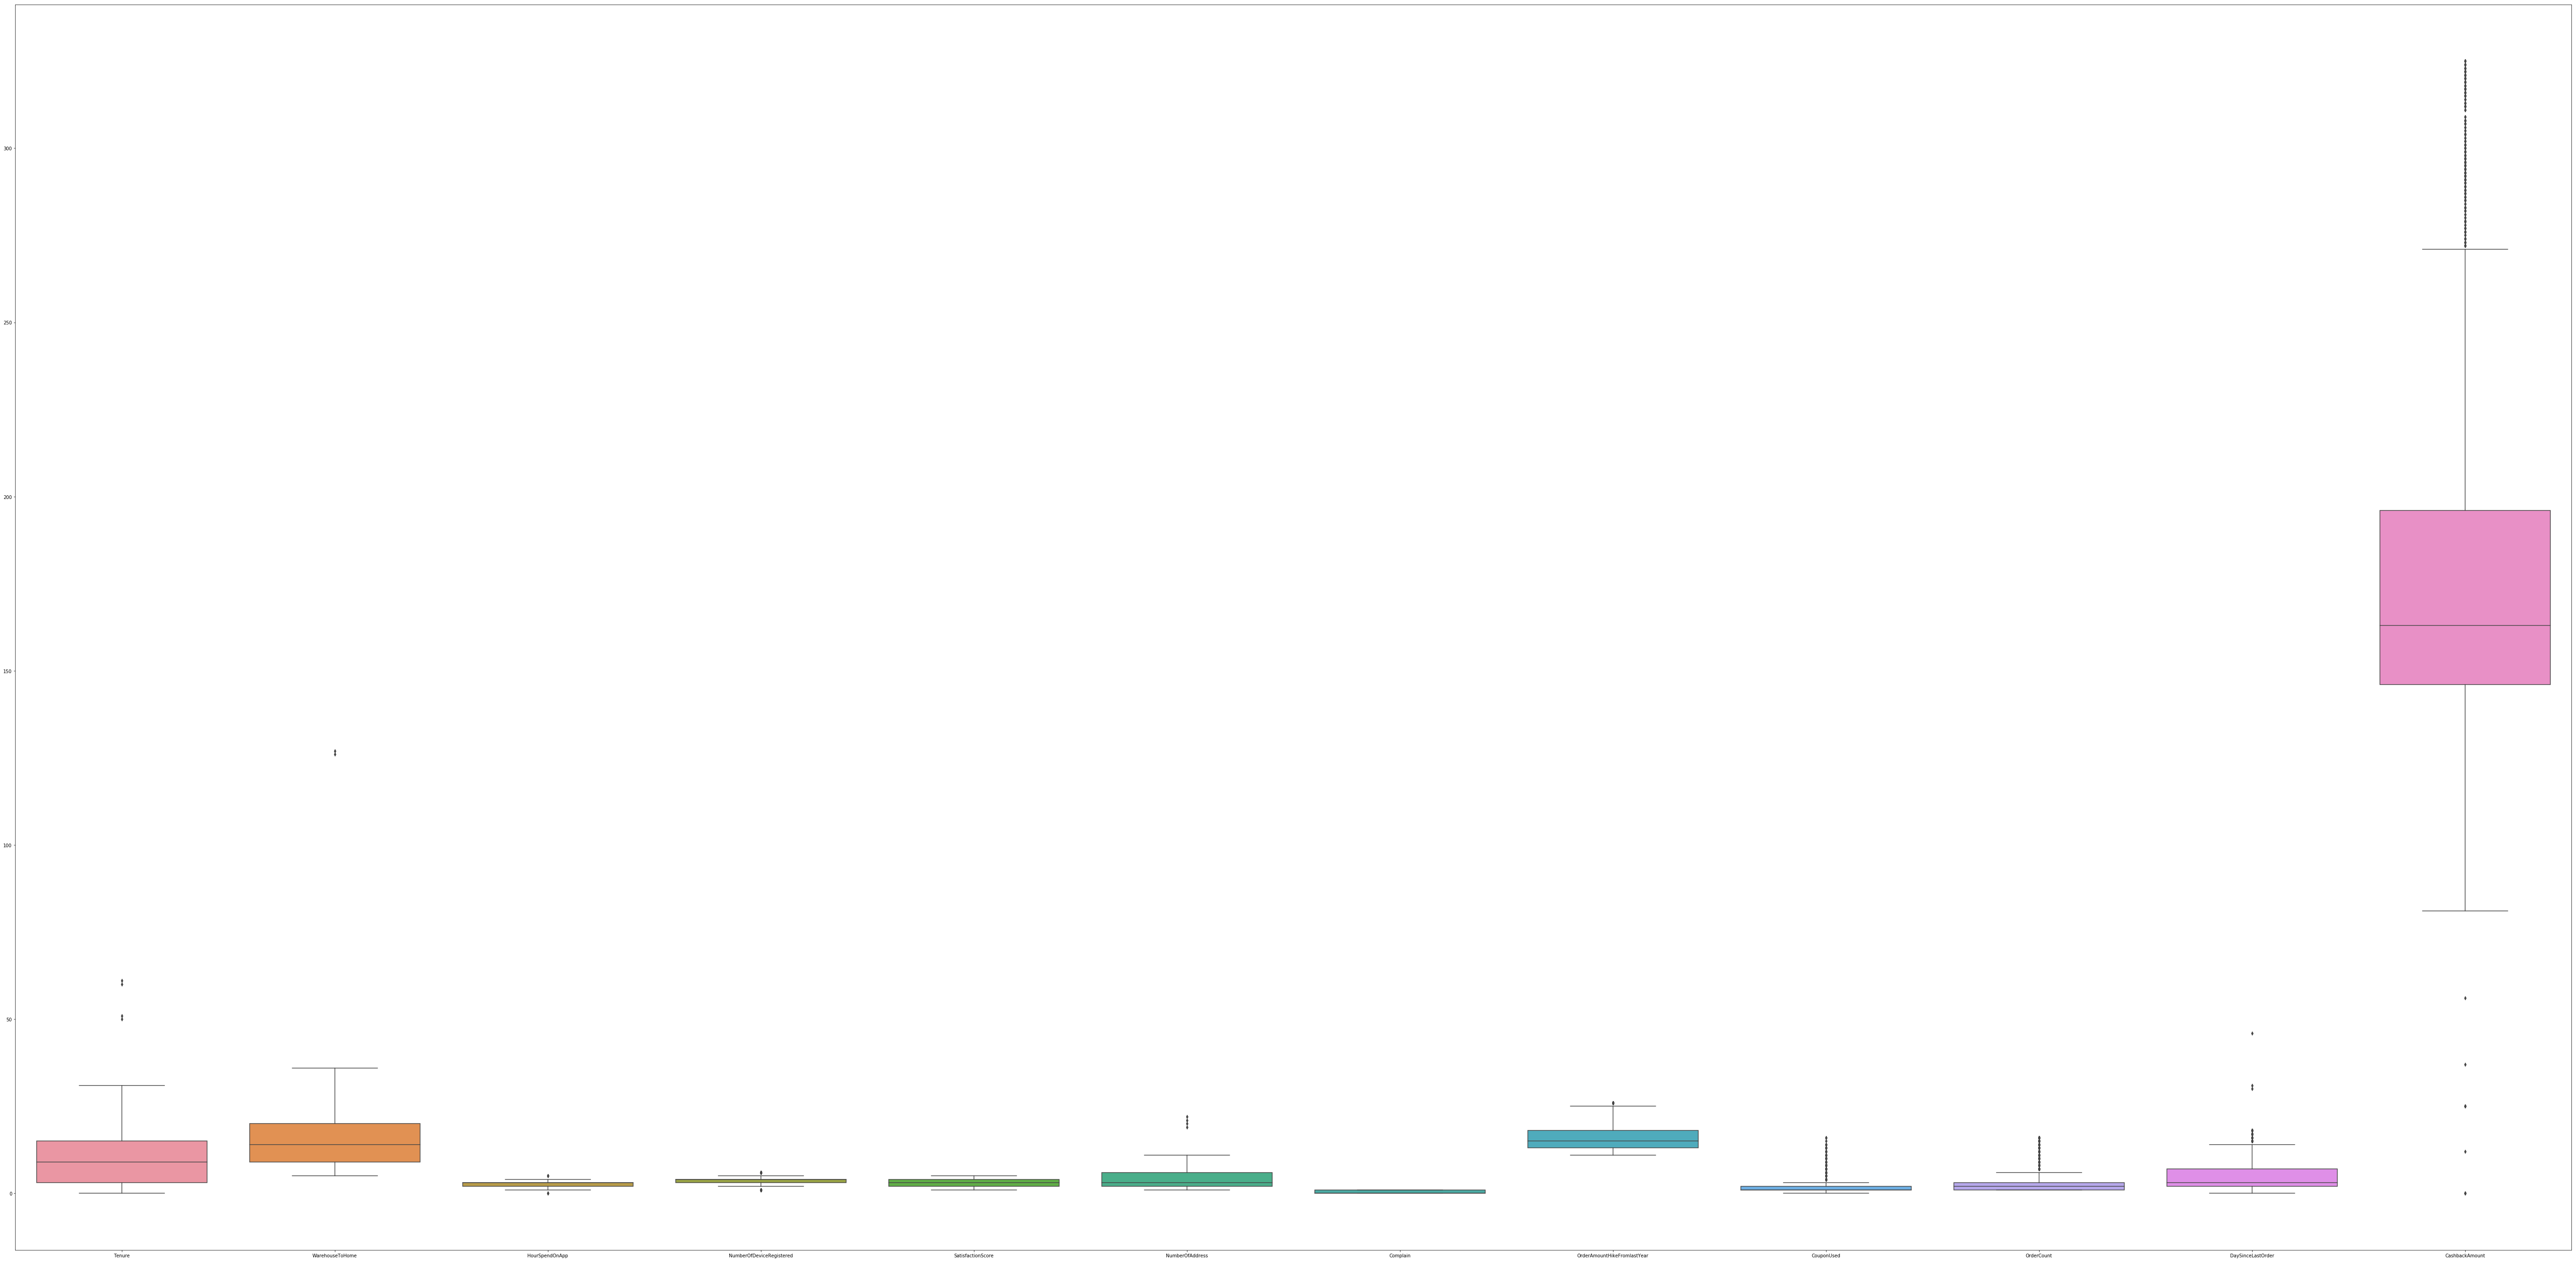

In [45]:
plt.figure(figsize=(100,50))
sns.boxplot(data=df_numeric)

## Categorical Encoding

In [85]:
cat_data= df.select_dtypes(include='object')
cat_data

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,Phone,3,Debit Card,Female,Laptop & Accessory,Single
1,1,Phone,1,UPI,Male,Mobile,Single
2,1,Phone,1,Debit Card,Male,Mobile,Single
3,1,Phone,3,Debit Card,Male,Laptop & Accessory,Single
4,1,Phone,1,Credit Card,Male,Mobile,Single
5,1,Computer,1,Debit Card,Female,Mobile,Single
6,1,Phone,3,COD,Male,Laptop & Accessory,Divorced
7,1,Phone,1,Credit Card,Male,Mobile,Divorced
8,1,Phone,3,E wallet,Male,Mobile,Divorced
9,1,Phone,1,Debit Card,Male,Mobile,Single


In [86]:
cat_data=cat_data.drop('Churn', axis=1)

In [87]:
cat_data

,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Phone,3,Debit Card,Female,Laptop & Accessory,Single
1,Phone,1,UPI,Male,Mobile,Single
2,Phone,1,Debit Card,Male,Mobile,Single
3,Phone,3,Debit Card,Male,Laptop & Accessory,Single
4,Phone,1,Credit Card,Male,Mobile,Single
5,Computer,1,Debit Card,Female,Mobile,Single
6,Phone,3,COD,Male,Laptop & Accessory,Divorced
7,Phone,1,Credit Card,Male,Mobile,Divorced
8,Phone,3,E wallet,Male,Mobile,Divorced
9,Phone,1,Debit Card,Male,Mobile,Single


In [88]:
encoded=pd.get_dummies(cat_data,drop_first=True)

In [89]:
encoded

,PreferredLoginDevice_Phone,CityTier_2,CityTier_3,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,1,0,0,1,0,0,1
2,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,0,1,0,1,0,0,1,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,1,0,0,1
5,0,0,0,0,1,0,0,0,0,0,1,0,0,1
6,1,0,1,0,0,0,0,1,0,1,0,0,0,0
7,1,0,0,1,0,0,0,1,0,0,1,0,0,0
8,1,0,1,0,0,1,0,1,0,0,1,0,0,0
9,1,0,0,0,1,0,0,1,0,0,1,0,0,1


In [90]:
df_numeric

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130
5,0.0,22.0,3.0,5,5,2,1,22.0,4.0,6.0,7.0,139
6,9.0,11.0,2.0,3,2,4,0,14.0,0.0,1.0,0.0,121
7,9.0,6.0,3.0,3,2,3,1,16.0,2.0,2.0,0.0,123
8,13.0,9.0,3.0,4,3,2,1,14.0,0.0,1.0,2.0,127
9,9.0,31.0,2.0,5,3,2,0,12.0,1.0,1.0,1.0,123


In [91]:
enc_data=pd.concat([df.drop(cat_data.columns,axis=1),encoded],axis=1)

In [92]:
enc_data

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,3.0,3,2,9,1,11.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,...,0,0,1,1,0,0,1,0,0,1
2,1,9.0,30.0,2.0,4,3,6,1,14.0,0.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0.0,15.0,2.0,4,5,8,0,23.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,1,0.0,12.0,3.0,3,5,3,0,11.0,1.0,...,0,0,0,1,0,0,1,0,0,1
5,1,0.0,22.0,3.0,5,5,2,1,22.0,4.0,...,1,0,0,0,0,0,1,0,0,1
6,1,9.0,11.0,2.0,3,2,4,0,14.0,0.0,...,0,0,0,1,0,1,0,0,0,0
7,1,9.0,6.0,3.0,3,2,3,1,16.0,2.0,...,0,0,0,1,0,0,1,0,0,0
8,1,13.0,9.0,3.0,4,3,2,1,14.0,0.0,...,0,1,0,1,0,0,1,0,0,0
9,1,9.0,31.0,2.0,5,3,2,0,12.0,1.0,...,1,0,0,1,0,0,1,0,0,1


## Prediction Model

In [95]:
#Splitting into test and train data

X=enc_data.drop(['Churn'],axis=1)
Y=enc_data['Churn']
Y=Y.astype('int')
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=0)


#Cross_Validation
skfcv= StratifiedKFold(n_splits=5)
skfcv

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [96]:
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
predictions=lgr.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
score=lgr.score(X_test,Y_test)
score

0.8934280639431617

In [103]:
cm=metrics.confusion_matrix(Y_test,predictions)
cm

array([[899,  37],
       [ 83, 107]])

In [106]:
acc=metrics.accuracy_score(Y_test,predictions)
acc

0.8934280639431617

In [107]:
f1=metrics.f1_score(Y_test,predictions)
f1

0.6407185628742514

## RandomForest Classifier

In [114]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
pred1=rf.predict(X_test)
pred2=rf.predict(X_train)

In [110]:
acc1=metrics.accuracy_score(Y_test,pred1)
acc1

0.9653641207815276

In [111]:
f1_1=metrics.f1_score(Y_test,pred1)
f1_1

0.8913649025069638

In [112]:
cm1=metrics.confusion_matrix(Y_test,pred1)
cm1

array([[927,   9],
       [ 30, 160]])

In [120]:
#Finding Important Features

ft_imp= pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
ft_imp

Tenure                                 0.219930
CashbackAmount                         0.086452
WarehouseToHome                        0.075357
NumberOfAddress                        0.065616
Complain                               0.062549
DaySinceLastOrder                      0.062317
OrderAmountHikeFromlastYear            0.059928
SatisfactionScore                      0.047001
NumberOfDeviceRegistered               0.035059
OrderCount                             0.035015
CouponUsed                             0.028764
MaritalStatus_Single                   0.026072
PreferedOrderCat_Mobile                0.025991
CityTier_3                             0.020608
HourSpendOnApp                         0.019846
Gender_Male                            0.019580
PreferredLoginDevice_Phone             0.019203
PreferredPaymentMode_Credit Card       0.016657
PreferredPaymentMode_Debit Card        0.015017
PreferedOrderCat_Laptop & Accessory    0.014399
MaritalStatus_Married                  0

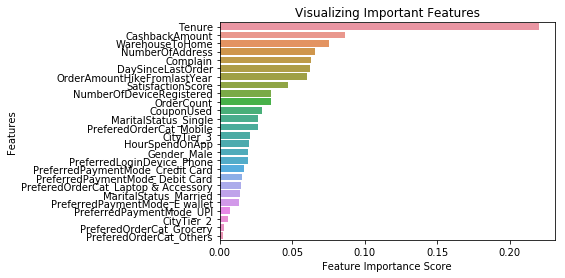

In [126]:
#Visualizong Feature Importance

sns.barplot(x=ft_imp,y=ft_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()